# Demonstrations

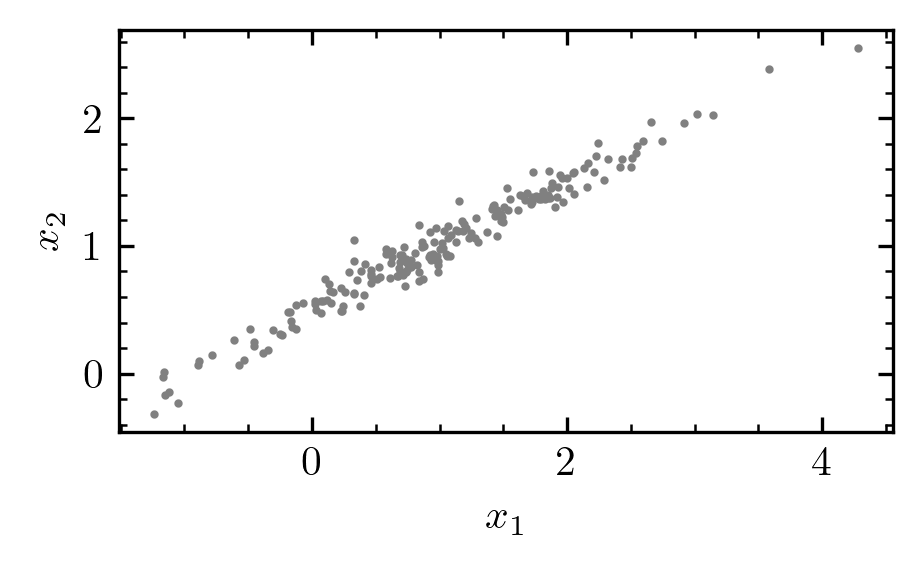

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
mean = [1, 1]
cov = [[1.0, 0.5], [0.5, 0.26]]
x = np.random.multivariate_normal(mean, cov, size=200)
plt.scatter(x[:, 0], x[:, 1], s=1, color='grey')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.gca().set_aspect('equal')

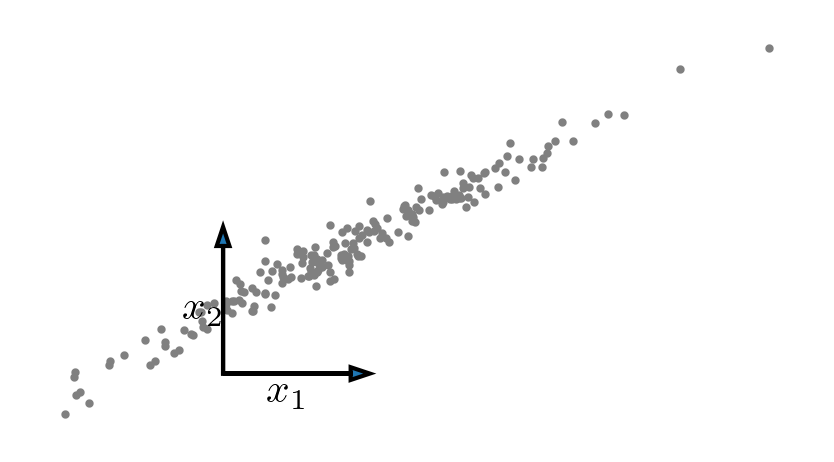

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
mean = [1, 1]
cov = [[1.0, 0.5], [0.5, 0.26]]
x = np.random.multivariate_normal(mean, cov, size=200)
plt.scatter(x[:, 0], x[:, 1], s=1, color='grey')
plt.arrow(0, 0, 1, 0, head_width=0.1)
plt.text(0.5, 0, r'$x_1$', va='top', ha='center')
plt.arrow(0, 0, 0, 1, head_width=0.1)
plt.text(0, 0.5, r'$x_2$', va='center', ha='right')
plt.gca().axis("off")
plt.gca().set_aspect('equal')

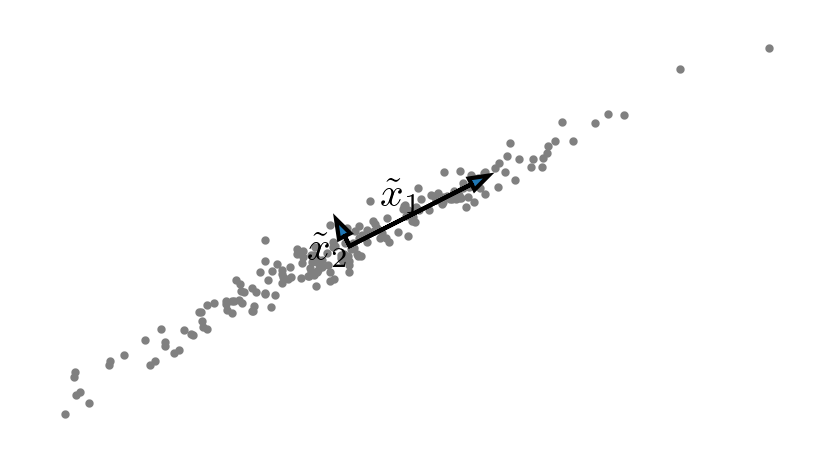

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

np.random.seed(42)
mean = [1, 1]
cov = [[1.0, 0.5], [0.5, 0.26]]
x = np.random.multivariate_normal(mean, cov, size=200)
plt.scatter(x[:, 0], x[:, 1], s=1, color='grey')

pca = PCA().fit(x)
mean = pca.mean_
for i, (v, l) in enumerate(zip(
        pca.components_, np.sqrt(pca.explained_variance_))):
    plt.arrow(mean[0], mean[1], v[0] * l, v[1] * l, head_width=0.1)
    plt.text(mean[0] + v[0] / 2.0 * l - v[1] / 6,
             mean[1] + v[1] / 2.0 * l + v[0] / 6, rf'$\tilde x_{i+1}$',
             va='center', ha='center')

plt.gca().axis("off")
plt.gca().set_aspect('equal')

# Exercise: Eigenfaces

Eigenfaces* are a well-known and illustrative example of Principal Component Analysis (PCA). Once widely used in facial recognition, eigenfaces have since been surpassed by more advanced deep learning approaches. The core idea of eigenfaces is to represent facial images as $n$-dimensional vectors, where $n$ is the number of pixels in the image. Each pixel corresponds to one dimension, and its value represents the intensity (brightness) of that pixel.

In this exercise, we will perform an eigenface analysis using the **Labeled Faces in the Wild (LFW)** dataset. The provided code below will help you load the dataset and display images using `matplotlib`.

(a) Calculate and display the **average face** across all images in the LFW dataset.

(b) Perform **PCA** on the LFW dataset. Display the **mean face** and the first **5 eigenfaces**. What do these eigenfaces represent? What features do they encode?

(c) Plot the **explained variance** as a function of the number of principal components. This is known as a **scree plot**.

(d) Plot the **cumulative explained variance** as a function of the number of PCA components. How many components are required to explain at least **99.9%** of the variance?

(e) Select a **random face** from the dataset. Reconstruct and display it using only the first 5, 10, 50, 100, 500, 1000 eigenfaces.

To display an image using only the first $n$ eigenfaces, you can follow these steps:
1. Transform the image into PCA space using `pca.transform`.
2. Set all but the first *n* components to zero.
3. Use `pca.inverse_transform` to convert back to the original image space.

(f) Repeat part (e) using a picture of **your own face** or an image from the internet. For best results, ensure the image has an approximate **5:6 aspect ratio**. What differences do you observe compared to your results in part (e)?

ValueError: cannot reshape array of size 1 into shape (62,47)

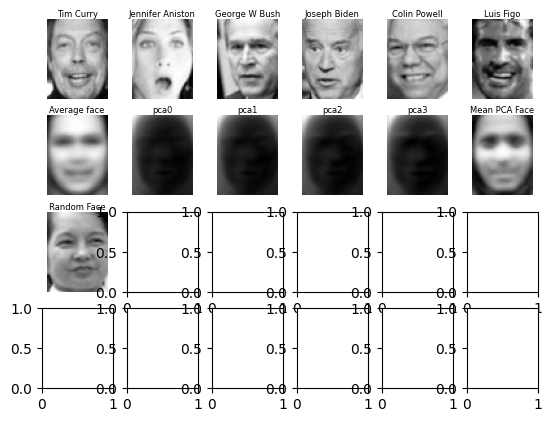

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import random

lfw = fetch_lfw_people()
X = normalize(lfw.data)
SHAPE = lfw.images.shape[1:]
names = lfw.target_names[lfw.target]

pca = PCA().fit(X)
faces = pca.get_covariance()

def show(x, title=None, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.imshow(-x.reshape(SHAPE), cmap='Greys')
    ax.axis("off")
    ax.set_title(title, fontsize=6, pad=0)

fig, axs = plt.subplots(ncols=6, nrows=4)
axs = axs.flatten()
for i, ax in zip([0, 42, 57, 99, 300, 1500], axs):
    show(X[i], title=names[i], ax=ax)

def average_face():
    show(np.mean(X, axis=0), title='Average face', ax=axs[6])

def eigenface_pca():
    mean_face = np.mean(faces, axis=0)
    mean_face = -mean_face
    for face in range(0, 4):
        show(faces[face], title=pca.get_feature_names_out()[face], ax=axs[7 + face])
    show(mean_face, title='Mean PCA Face', ax=axs[11])

def random_eigenface_pca():
    random_face = random.choice(X)
    show(random_face, title='Random Face', ax=axs[12])

    face_pca = PCA().fit(random_face)

    pca_index_list = [5, 10, 50, 100, 500, 1000]
    for index in range(len(pca_index_list)):
        pca_index = pca_index_list[index]
        show(face_pca.get_covariance()[pca_index], title=face_pca.get_feature_names_out()[pca_index], ax=axs[12 + index])

average_face()
eigenface_pca()
random_eigenface_pca()


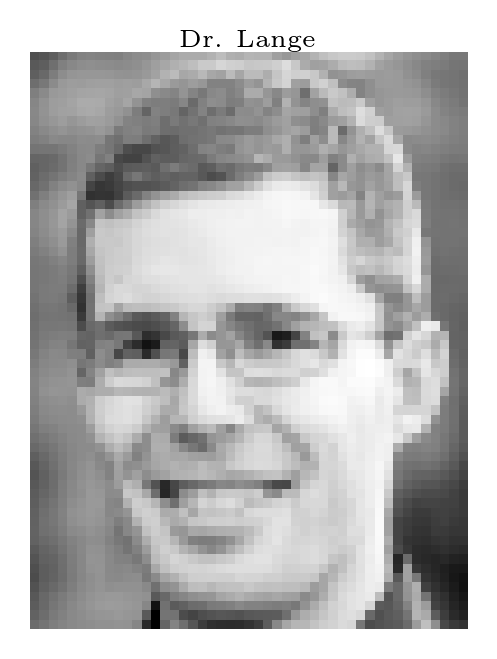

In [5]:
from scipy.interpolate import RectBivariateSpline

def read_image(filename):
    img = plt.imread(filename)
    if img.ndim == 3:
        img = img @ [0.299 , 0.587, 0.114]
    img = RectBivariateSpline(
        np.linspace(0, 1, img.shape[0]), np.linspace(0, 1, img.shape[1]),
        img)
    n = 10
    img = img(np.linspace(0, 1, SHAPE[0] * n),
              np.linspace(0, 1, SHAPE[1] * n))
    img = img.reshape(SHAPE[0], n, SHAPE[1], n)
    img = np.mean(img, axis=(1, 3)).ravel()
    return img

show(read_image('Class_9_Image.jpg'), title='Dr. Lange')